In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


meta = unpickle('CIFAR-100/meta')
train = unpickle('CIFAR-100/train')
test = unpickle('CIFAR-100/test')
train_data = train[b'data']
train_data = train_data.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("float32")
train_target = tf.one_hot(train[b'fine_labels'],100)
test_data = test[b'data']
test_data = test_data.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float32")
test_target = tf.one_hot(test[b'fine_labels'], 100)

# Normalize data
train_data = train_data / 127.5 - 1
test_data = test_data / 127.5 - 1

In [0]:
def data_gen(data, target, batch_size=64):
  xs = list()
  ys = list()
  length = len(data) - 1
  while True:
    while len(xs) < batch_size:
      index = random.randint(0,length)
      xs.append(data[index])
      ys.append(target[index])
    
    xs_b = np.array(xs)
    ys_b = np.array(ys)

    xs.clear()
    ys.clear()

    yield xs_b, ys_b

  

In [0]:
train_data = data_gen(train_data,train_target)
test_data = data_gen(test_data,test_target)

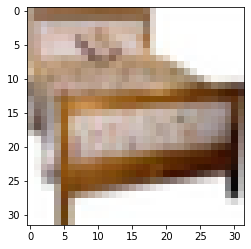

In [47]:
plt.imshow(next(train_data)[0][0] * 0.5 + 0.5)

In [0]:
import cv2
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

inp = Input(shape=(32,32,3))
net = Conv2D(32,(3,3),activation=None)(inp)
net = BatchNormalization()(net)
net = Activation('relu')(net)
net = Conv2D(64,(3,3),activation=None)(net)
net = BatchNormalization()(net)
net = Activation('relu')(net)
net = MaxPool2D((2,2))(net)

net = Conv2D(128,(3,3),activation=None)(net)
net = BatchNormalization()(net)
net = Activation('relu')(net)
net = Conv2D(256,(3,3),activation=None)(net)
net = BatchNormalization()(net)
net = Activation('relu')(net)
net = MaxPool2D((2,2))(net)

net = Flatten()(net)

net =  Dense(128,activation=None)(net)
net = BatchNormalization()(net)
net = Activation('relu')(net)
net = Dense(100, activation='softmax')(net)

model = Model([inp],[net])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [53]:
model.fit_generator(
    train_data,
    steps_per_epoch=100,
    epochs=30,
    validation_data=test_data,
    validation_steps=10
)

Epoch 1/30
100/100 [==============================] - 92s 924ms/step - loss: 2.1463 - accuracy: 0.4536 - val_loss: 2.3998 - val_accuracy: 0.3781
Epoch 2/30
100/100 [==============================] - 93s 928ms/step - loss: 2.1059 - accuracy: 0.4517 - val_loss: 2.6203 - val_accuracy: 0.3531
Epoch 3/30
100/100 [==============================] - 94s 936ms/step - loss: 2.0062 - accuracy: 0.4798 - val_loss: 2.4624 - val_accuracy: 0.3938
Epoch 4/30
100/100 [==============================] - 93s 930ms/step - loss: 1.9139 - accuracy: 0.5016 - val_loss: 2.4608 - val_accuracy: 0.3719
Epoch 5/30
100/100 [==============================] - 95s 950ms/step - loss: 1.9011 - accuracy: 0.5091 - val_loss: 2.4611 - val_accuracy: 0.3891
Epoch 6/30
100/100 [==============================] - 95s 945ms/step - loss: 1.8249 - accuracy: 0.5241 - val_loss: 2.3888 - val_accuracy: 0.3891
Epoch 7/30
100/100 [==============================] - 92s 919ms/step - loss: 1.7627 - accuracy: 0.5373 - val_loss: 2.4024 - val_ac